In [141]:
# OpenSoundscape imports
from opensoundscape import Audio, Spectrogram
from opensoundscape.annotations import BoxedAnnotations

# General-purpose packages
import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path


from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for big visuals
%config InlineBackend.figure_format = 'retina'


Loading Raven Files

In [142]:
from glob import glob
import os
import re

# Assuming your current working directory is the base path
base_path = os.getcwd()

# Folder name
folder_name = "ravenSelectionTables"

# Construct the relative path
relative_folder_path = os.path.join(base_path, folder_name)

# Use glob to find all .txt files directly in the folder
selections = glob(os.path.join(relative_folder_path, "*.txt"))
# Regular expression pattern to extract the date and time part
pattern = r"(\d{8}_\d{6})" #NOTE THIS MAY NOT WORK FOR ALL RECORDINGS IN OTHER FILES

# Iterate through files and rename to include only the date and time part
for old_file_path in selections:
    old_file_name = os.path.basename(old_file_path)
    
    # Use regex to find the date and time part
    match = re.search(pattern, old_file_name)
    
    if match:
        new_file_name = match.group(1)
        
        # Construct the new file path
        new_file_path = os.path.join(relative_folder_path, new_file_name + ".txt")
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {old_file_path} to {new_file_path}")
    else:
        print(f"No match found in filename: {old_file_name}")

# Optional: Print the updated list of files in ravenSelectionTables
updated_selections = glob(os.path.join(relative_folder_path, "*.txt"))
print(updated_selections)




Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221022_060000.txt to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221022_060000.txt
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221024_060000.txt to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221024_060000.txt
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221025_060000.txt to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221025_060000.txt
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221027_060000.txt to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221027_060000.txt
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221029_060000.txt to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221029_060000.txt
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221101_060000.txt to C:\Users\vishal\Desktop\BirdCoding-ma

Rename audio files to match raven txt selection file names

In [143]:
# create a list of audio files, one corresponding to each Raven file
'''so this is going through the ravenSelectionTables folder and finidng the audio files. 
For now, we manually make sure the audio name is EXACT SAME as the txt file name.'''
audio_files = glob(os.path.join(relative_folder_path, "*.wav"))

# Regular expression pattern to extract the date and time part
pattern = r"(\d{8}_\d{6})" #NOTE THIS MAY NOT WORK FOR ALL RECORDINGS IN OTHER FILES

# Iterate through files and rename to include only the date and time part
for old_file_path in audio_files:
    old_file_name = os.path.basename(old_file_path)
    
    # Use regex to find the date and time part
    match = re.search(pattern, old_file_name)
    
    if match:
        new_file_name = match.group(1)
        
        # Construct the new file path
        new_file_path = os.path.join(relative_folder_path, new_file_name + ".wav")
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {old_file_path} to {new_file_path}")
    else:
        print(f"No match found in filename: {old_file_name}")

# Optional: Print the updated list of files in ravenSelectionTables
updated_audio_files = glob(os.path.join(relative_folder_path, "*.wav"))
print(updated_audio_files)


Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221022_060000.wav to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221022_060000.wav
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221024_060000.wav to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221024_060000.wav
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221025_060000.wav to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221025_060000.wav
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221027_060000.wav to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221027_060000.wav
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221029_060000.wav to C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221029_060000.wav
Renamed: C:\Users\vishal\Desktop\BirdCoding-main\ravenSelectionTables\20221101_060000.wav to C:\Users\vishal\Desktop\BirdCoding-ma

In [144]:
# Path to the directory containing Raven selection tables
dataset_path = Path("./ravenSelectionTables/")

# Using glob to find all files with a .txt extension in the specified directory
selection_files = glob(f"{dataset_path}/*.txt")

# Counting the number of .txt files found
len(selection_files)

# Creating a list comprehension to generate corresponding audio file names
audio_files = [f.replace('.txt','.wav') for f in selections]

In [145]:
# Creates BoxedAnnotations object from Raven selection files and corresponding audio files
annotations = BoxedAnnotations.from_raven_files(selection_files, audio_files)

# Rename the 'annotation' column to 'length'
annotations.df.rename(columns={'annotation': 'length'}, inplace=True)

# Rename the 'Annotation' column to 'annotation'
annotations.df.rename(columns={'Annotation': 'annotation'}, inplace=True)

C:\Users\vishal\anaconda3\Lib\site-packages\opensoundscape\annotations.py:258: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_annotations = pd.concat(all_file_dfs).reset_index(drop=True)


In [189]:
# Defines parameters for creating one-hot encoded clip labels
clip_duration = 1  # Duration of each clip in seconds
clip_overlap = 0.5  # Overlap between consecutive clips in seconds
min_label_overlap = 0.1  # Minimum overlap required with a label for a clip to be considered positive
species_of_interest = ["NOBO"]  # List of species for which to create one-hot encoded labels

# Creates one-hot encoded clip labels DataFrame using annotations
labels_df = annotations.one_hot_clip_labels(
    clip_duration=clip_duration,
    clip_overlap=clip_overlap,
    min_label_overlap=min_label_overlap,
    class_subset=species_of_interest  # Specify the species of interest to include in the labels
)

# Prints the resulting DataFrame containing one-hot encoded clip labels
print(labels_df)


                                                                        NOBO
file                                               start_time end_time      
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 0.0        1.0        0.0
                                                   0.5        1.5        0.0
                                                   1.0        2.0        0.0
                                                   1.5        2.5        0.0
                                                   2.0        3.0        0.0
...                                                                      ...
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 597.0      598.0      0.0
                                                   597.5      598.5      0.0
                                                   598.0      599.0      0.0
                                                   598.5      599.5      0.0
                                                   599.0      600.0      0.0

In [190]:
import random

# Get the list of files in the directory with '.txt' extension
files = os.listdir("./ravenSelectionTables/")
files = [file for file in files if file.endswith('.txt')]

# Randomly select 20% of the files for the test set
random_files = random.sample(files, int(float(len(selection_files)) * 0.2))

# Remove '.txt' extension from file names
l = [str(file).replace(".txt", "") for file in random_files]

# Create a mask to filter the test set from the labels DataFrame
mask = labels_df.reset_index()['file'].apply(lambda x: any(file_name in x for file_name in l)).values

# Filter out the test set and create train and validation sets
test_set = labels_df[mask]
train_and_val_set = labels_df.drop(test_set.index)

# Save train and validation sets and test set to CSV files
train_and_val_set.to_csv("./train_and_val_set.csv")
test_set.to_csv("./test_set.csv")

# Read train and validation sets and test set from CSV files
train_and_val_set = pd.read_csv('./train_and_val_set.csv', index_col=[0, 1, 2])
test_set = pd.read_csv('./test_set.csv', index_col=[0, 1, 2])

In [148]:
import sklearn

# Split the train_and_val_set DataFrame into training and validation sets
# test_size=0.1 means 10% of the dataset will be used for validation
# random_state=0 sets the seed for the random number generator for reproducibility
train_df, valid_df = sklearn.model_selection.train_test_split(train_and_val_set, test_size=0.1, random_state=0)

In [149]:
# Save the training set as a CSV file
train_df.to_csv("./train_set.csv")

# Save the validation set as a CSV file
valid_df.to_csv("./valid_set.csv")

In [150]:
'''
count=0
for index, row in train_df.iterrows():
    if row["NOBO"]==1:
        count=count+1
train_positives=count

count=0
for index, row in valid_df.iterrows():
    if row["NOBO"]==1:
        count=count+1
valid_positives=count

count=0
for index, row in test_set.iterrows():
    if row["NOBO"]==1:
        count=count+1
test_positives=count

count=0
for index, row in train_df.iterrows():
    count=count+1
total_train=count

count=0
for index, row in valid_df.iterrows():
    count=count+1
total_valid=count

count=0
for index, row in test_set.iterrows():
    count=count+1
total_test=count
'''

'\ncount=0\nfor index, row in train_df.iterrows():\n    if row["NOBO"]==1:\n        count=count+1\ntrain_positives=count\n\ncount=0\nfor index, row in valid_df.iterrows():\n    if row["NOBO"]==1:\n        count=count+1\nvalid_positives=count\n\ncount=0\nfor index, row in test_set.iterrows():\n    if row["NOBO"]==1:\n        count=count+1\ntest_positives=count\n\ncount=0\nfor index, row in train_df.iterrows():\n    count=count+1\ntotal_train=count\n\ncount=0\nfor index, row in valid_df.iterrows():\n    count=count+1\ntotal_valid=count\n\ncount=0\nfor index, row in test_set.iterrows():\n    count=count+1\ntotal_test=count\n'

In [151]:
'''
# Initialize count variable to keep track of the number of instances processed
count = 1

# Initialize an empty list to store the indices of instances to be removed from the training set
l = []

# Iterate through each row in the training set
for index, row in train_df.iterrows():
    # Check if the label for the class "NOBO" is 0 and the count is within the specified threshold
    if row["NOBO"] == 0 and count <= total_train - (train_positives + (train_positives*2)):
        # If the conditions are met, append the index of the row to the list
        l.append(index)
        # Increment the count
        count += 1

# Reset the count variable to 1 for the validation set
count = 1

# Initialize an empty list to store the indices of instances to be removed from the validation set
vl = []

# Iterate through each row in the validation set
for index, row in valid_df.iterrows():
    # Check if the label for the class "NOBO" is 0 and the count is within the specified threshold
    if row["NOBO"] == 0 and count <= total_valid - (valid_positives + (valid_positives*2)):
        # If the conditions are met, append the index of the row to the list
        vl.append(index)
        # Increment the count
        count += 1
'''

'\n# Initialize count variable to keep track of the number of instances processed\ncount = 1\n\n# Initialize an empty list to store the indices of instances to be removed from the training set\nl = []\n\n# Iterate through each row in the training set\nfor index, row in train_df.iterrows():\n    # Check if the label for the class "NOBO" is 0 and the count is within the specified threshold\n    if row["NOBO"] == 0 and count <= total_train - (train_positives + (train_positives*2)):\n        # If the conditions are met, append the index of the row to the list\n        l.append(index)\n        # Increment the count\n        count += 1\n\n# Reset the count variable to 1 for the validation set\ncount = 1\n\n# Initialize an empty list to store the indices of instances to be removed from the validation set\nvl = []\n\n# Iterate through each row in the validation set\nfor index, row in valid_df.iterrows():\n    # Check if the label for the class "NOBO" is 0 and the count is within the specified 

In [152]:
'''
# Drop rows from train_df based on indices in l
train_df = train_df.drop(l)

# Drop rows from valid_df based on indices in vl
valid_df = valid_df.drop(vl)
'''

'\n# Drop rows from train_df based on indices in l\ntrain_df = train_df.drop(l)\n\n# Drop rows from valid_df based on indices in vl\nvalid_df = valid_df.drop(vl)\n'

In [153]:
# Randomly shuffle the rows of train_df
train_df = train_df.sample(frac=1)

# Randomly shuffle the rows of valid_df
valid_df = valid_df.sample(frac=1)

# Print the shuffled train_df
print(train_df)

# Print the shuffled valid_df
print(valid_df)

                                                                        NOBO
file                                               start_time end_time      
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 435.5      436.5      0.0
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 504.0      505.0      0.0
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 337.0      338.0      0.0
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 432.5      433.5      0.0
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 339.0      340.0      0.0
...                                                                      ...
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 86.0       87.0       0.0
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 329.5      330.5      0.0
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 93.0       94.0       0.0
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 202.0      203.0      0.0
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 67.0       68.0       0.0

In [154]:
from opensoundscape import CNN

# Use resnet34 architecture
architecture = 'resnet34'

# Can use this code to get your classes, if needed
# Retrieve the list of classes from the columns of the train_df DataFrame
class_list = list(train_df.columns)

# Initialize a CNN model with the specified architecture, classes, and sample duration
model = CNN(
    architecture=architecture,      # Architecture of the CNN model
    classes=class_list,             # List of classes for classification
    sample_duration=clip_duration  # Duration of audio clips used for training
)

In [155]:
# Not working currently
'''
import wandb
try:
    wandb.login()
    wandb_session = wandb.init(
        entity='Quail', #replace with your entity/group name
        project='BirdCoding',
        name='Train CNN',
    )
except: #if wandb.init fails, don't use wandb logging
    print('failed to create wandb session. wandb session will be None')
    wandb_session = None
'''

wandb: Currently logged in as: yashwanthpinnapu (quail). Use `wandb login --relogin` to force relogin
wandb: Currently logged in as: yashwanthpinnapu. Use `wandb login --relogin` to force relogin
C:\Users\vishal\anaconda3\Lib\site-packages\wandb\sdk\lib\ipython.py:77: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display  # type: ignore


In [156]:
# Define the folder path where model training checkpoints will be saved
checkpoint_folder = Path("model_training_checkpoints")

# Create the folder if it doesn't exist
checkpoint_folder.mkdir(exist_ok=True)


In [157]:
# Run this if you have a GPU
'''
from numba import jit, cuda
import torch
print(torch.cuda.is_available())
device = torch.device("cuda")
model.to(device)
'''

True


CNN(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [158]:
# Gives on what the code is running(cpu,cuda...)
print(f'model.device is: {model.device}')

model.device is: cuda:0


In [159]:
# Run this to train
'''
%%capture --no-stdout --no-display
# Train the model
model.train(
    train_df,  # Training dataset
    valid_df,  # Validation dataset
    epochs=10,  # Number of epochs for training
    batch_size=64,  # Batch size
    log_interval=1000,  # Log progress every 100 batches
    num_workers=12,  # Number of parallelized CPU tasks for preprocessing
    save_interval=5,  # Save checkpoint every 5 epochs
    save_path=checkpoint_folder  # Location to save checkpoints
)
'''

'\n%%capture --no-stdout --no-display\n# Train the model\nmodel.train(\n    train_df,  # Training dataset\n    valid_df,  # Validation dataset\n    epochs=10,  # Number of epochs for training\n    batch_size=64,  # Batch size\n    log_interval=1000,  # Log progress every 100 batches\n    num_workers=12,  # Number of parallelized CPU tasks for preprocessing\n    save_interval=5,  # Save checkpoint every 5 epochs\n    save_path=checkpoint_folder  # Location to save checkpoints\n)\n'

In [160]:
# Load a saved model
from opensoundscape import load_model
model=load_model("./model_training_checkpoints/best.model")

In [191]:
%%capture --no-stdout --no-display
# Generate predictions using the trained model on the test set
scores = model.predict(test_set, overlap_fraction=0.5, activation_layer='sigmoid')

  0%|          | 0/4796 [00:00<?, ?it/s]

In [192]:
# Insert a new column "present" with all values set to True
scores.insert(1, "present", True)

# Display the first few rows of the DataFrame
scores.head()


NOBO  \
file                                               start_time end_time             
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 0.0        1.0       0.000419   
                                                   0.5        1.5       0.000297   
                                                   1.0        2.0       0.000441   
                                                   1.5        2.5       0.000529   
                                                   2.0        3.0       0.000238   

                                                                        present  
file                                               start_time end_time           
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 0.0        1.0          True  
                                                   0.5        1.5          True  
                                                   1.0        2.0          True  
                                                   1.5        2.5          True  
                                                   2.0        3.0          True

In [163]:
# Save the validation set as a CSV file
scores.to_csv("./prediction_set.csv")

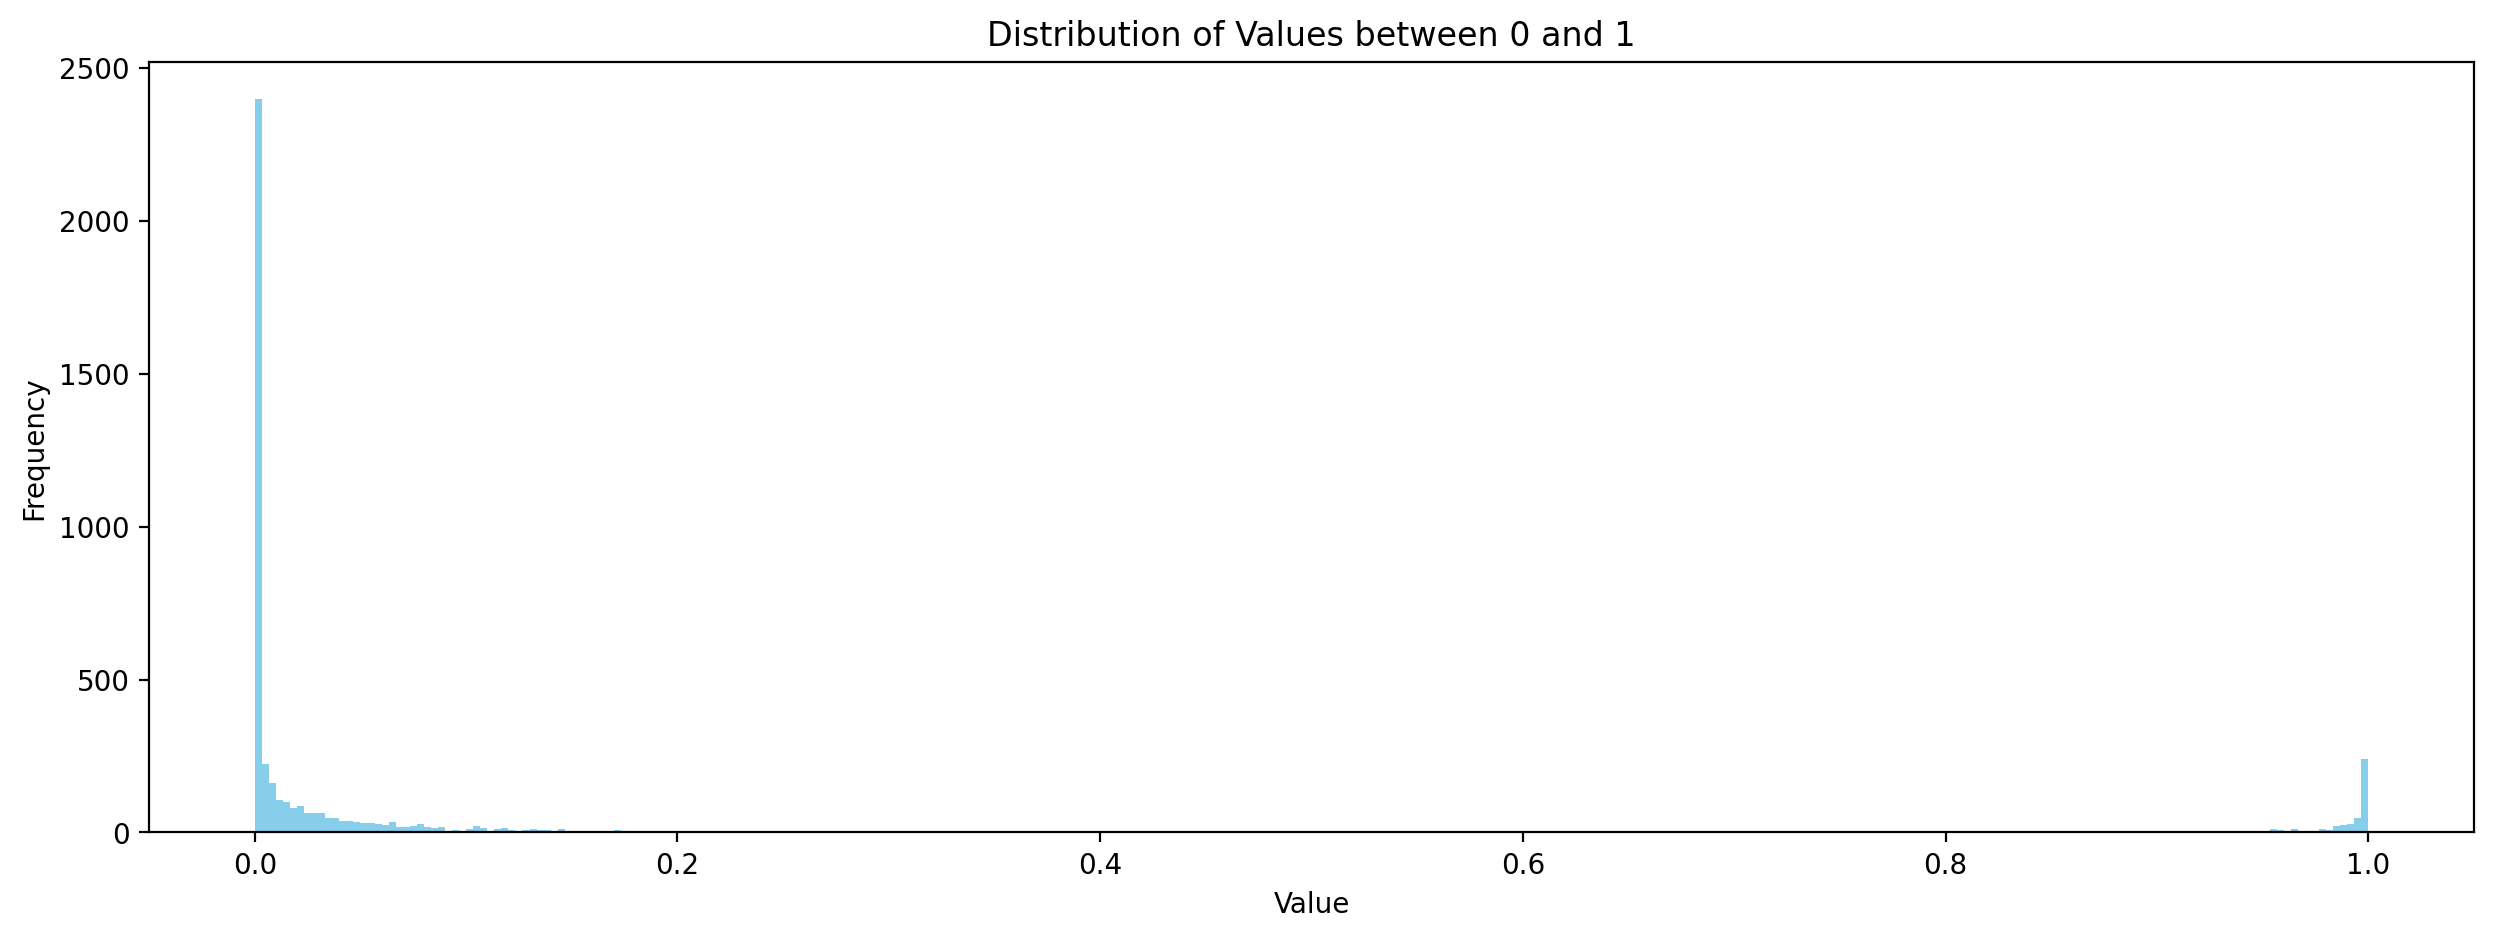

In [193]:
plt.hist(scores['NOBO'], bins=300, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xlim(0.75, 1)
#plt.ylim(0, 200)
#plt.xticks(np.arange(0.8, 1, 0.02))
plt.title('Distribution of Values between 0 and 1')
plt.show()

In [207]:
# Iterate through each row in the scores DataFrame
for index, row in scores.iterrows():
    # Check if the predicted score for the class 'NOBO' is greater than 0.5
    if row["NOBO"] > 0.5:
        # If the score is greater than 0.5, set the 'present' column value to 1
        scores.at[index, 'present'] = 1
    else:
        # If the score is not greater than 0.5, set the 'present' column value to 0
        scores.at[index, 'present'] = 0

# Display the first few rows of the scores DataFrame after updating the 'present' column
print(scores)

                                                                            NOBO  \
file                                               start_time end_time             
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 0.0        1.0       0.000419   
                                                   0.5        1.5       0.000297   
                                                   1.0        2.0       0.000441   
                                                   1.5        2.5       0.000529   
                                                   2.0        3.0       0.000238   
...                                                                          ...   
C:\Users\vishal\Desktop\BirdCoding-main\ravenSe... 597.0      598.0     0.021994   
                                                   597.5      598.5     0.026476   
                                                   598.0      599.0     0.015326   
                                                   598.5      599.5     0.07

In [218]:
# Initialize variables to count true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP = 0
TN = 0
FP = 0
FN = 0

# Iterate through each row in the scores DataFrame
for index, row in scores.iterrows():
    # Check if the predicted value (present) is equal to the ground truth value (NOBO) and both are 1 (true positive)
    if row["present"] == test_set.at[index,'NOBO'] == 1:
        TP += 1
    # Check if the predicted value (present) is equal to the ground truth value (NOBO) and both are 0 (true negative)
    elif row["present"] == test_set.at[index,'NOBO'] == 0:
        TN += 1
    # Check if the predicted value is 1 (positive) while the ground truth value is 0 (false positive)
    elif row["present"] == 1 and test_set.at[index,'NOBO'] == 0:
        FP += 1
    # Check if the predicted value is 0 (negative) while the ground truth value is 1 (false negative)
    elif row["present"] == 0 and test_set.at[index,'NOBO'] == 1:
        FN += 1

# Calculate accuracy, precision, recall, and F1 score
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * (precision * recall)) / (precision + recall)

# Create a confusion matrix
confusion_matrix = [[TP, FP], [FN, TN]]

# Print the metrics and confusion matrix
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1_score)
print("Confusion Matrix:", confusion_matrix)

Accuracy = 0.9706005004170142
Precision = 0.8881578947368421
Recall = 0.8809135399673735
F1 Score = 0.8845208845208845
Confusion Matrix: [[540, 68], [73, 4115]]


In [168]:
# Use this to check TP, FP, FN, FP
'''
        audio_object = Audio.from_file(index[0])
        trimmed = audio_object.trim(index[1],index[2])
        spectrogram_object = Spectrogram.from_audio(trimmed)
        trimmed.show_widget(normalize=True)
        fig= plt.subplots(figsize=(6, 4))  # Set the width to 8 inches and height to 4 inches
        spectrogram_object.plot()
        plt.show()
'''

'audio_object = Audio.from_file(scores.at[index,\'file\'])\ntrimmed = audio_object.trim(row["start_time"],row["end_time"])\ntrimmed.show_widget(normalize=True)'

In [167]:
'''
# Initialize an empty list to store indices of rows to be removed
tl = []

# Initialize a counter
count = 1

# Iterate through each row in the test_set DataFrame
for index, row in test_set.iterrows():
    # Check if the ground truth value (NOBO) is 0 and the count is less than the desired threshold
    if row["NOBO"] == 0 and count <= (total_test - (test_positives + 2*test_positives)):
        # Append the index of the row to the list
        tl.append(index)
        # Increment the counter
        count += 1

# Drop rows with indices specified in the list from the test_set DataFrame
test_set = test_set.drop(tl)
'''

'# Initialize an empty list to store indices of rows to be removed\ntl = []\n\n# Initialize a counter\ncount = 1\n\n# Iterate through each row in the test_set DataFrame\nfor index, row in test_set.iterrows():\n    # Check if the ground truth value (NOBO) is 0 and the count is less than the desired threshold\n    if row["NOBO"] == 0 and count <= (total_test - (test_positives + 2*test_positives)):\n        # Append the index of the row to the list\n        tl.append(index)\n        # Increment the counter\n        count += 1\n\n# Drop rows with indices specified in the list from the test_set DataFrame\ntest_set = test_set.drop(tl)'